In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

print(red.head())
print(white.tail())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [3]:
red['type'] = 0
white['type'] = 1
print(red.head(2))
print(white.tail(2))

wine = pd.concat([red, white])
print(wine.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  type  
0      9.4        5     0  
1      9.8        5     0  
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.

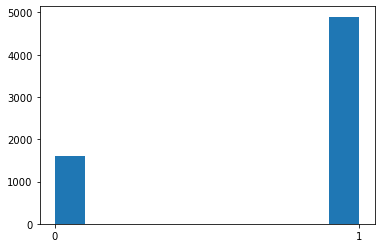

In [4]:
plt.hist(wine['type'])
plt.xticks([0,1])
plt.show()

In [5]:
print(wine['type'].value_counts())

1    4898
0    1599
Name: type, dtype: int64


In [6]:
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


In [7]:
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_norm.head(2))
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.297521          0.413333          0.0        0.019939   0.111296   
1       0.330579          0.533333          0.0        0.030675   0.147841   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.034722              0.064516  0.206092  0.612403   0.191011   
1             0.083333              0.140553  0.186813  0.372093   0.258427   

    alcohol   quality  type  
0  0.202899  0.333333   0.0  
1  0.260870  0.333333   0.0  
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        0.282257          0.173111     0.191948        0.074283   
std         0.107143          0.109758     0.087541        0.072972   
min         0.000000          0.000000     0.000000        0.000000   
25%         0.214876          0.100000     0.150602        0.018405   
50%        

In [8]:
wine_shuffle = wine_norm.sample(frac=1)
print(wine_shuffle.head())

wine_np = wine_shuffle.to_numpy()
print(wine_np[:5])

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2021       0.206612          0.086667     0.168675        0.013804   0.069767   
2341       0.280992          0.173333     0.180723        0.119632   0.069767   
1624       0.429752          0.060000     0.295181        0.006135   0.049834   
1081       0.338843          0.146667     0.409639        0.118098   0.068106   
450        0.280992          0.346667     0.120482        0.142638   0.101329   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
2021             0.156250              0.313364  0.109697  0.395349   
2341             0.135417              0.370968  0.201465  0.589147   
1624             0.156250              0.288018  0.113553  0.286822   
1081             0.126736              0.652074  0.116638  0.224806   
450              0.069444              0.387097  0.192597  0.240310   

      sulphates   alcohol   quality  type  
2021   0.112360  0.304348  0.500000   1.0 

In [9]:
train_idx = int(len(wine_np) * 0.8)

train_X , train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]

print(train_X[0])
print(train_Y[0])

print(test_X[0])
print(test_Y[0])

train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)

print(train_Y[0])
print(test_Y[0])

[0.20661157 0.08666667 0.1686747  0.01380368 0.06976744 0.15625
 0.31336406 0.10969732 0.39534884 0.11235955 0.30434783 0.5       ]
1.0
[0.24793388 0.40666667 0.         0.07668712 0.1910299  0.06944444
 0.11981567 0.24272219 0.57364341 0.28089888 0.31884058 0.33333333]
0.0
[0. 1.]
[1. 0.]


In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


In [11]:
his = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 0s 3ms/step - loss: 0.1349 - accuracy: 0.9428 - val_loss: 0.0600 - val_accuracy: 0.9869
Epoch 2/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0459 - accuracy: 0.9864 - val_loss: 0.0548 - val_accuracy: 0.9854
Epoch 3/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0509 - accuracy: 0.9856 - val_loss: 0.0426 - val_accuracy: 0.9892
Epoch 4/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0387 - accuracy: 0.9887 - val_loss: 0.0539 - val_accuracy: 0.9862
Epoch 5/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0411 - accuracy: 0.9877 - val_loss: 0.0386 - val_accuracy: 0.9892
Epoch 6/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0327 - accuracy: 0.9918 - val_loss: 0.0354 - val_accuracy: 0.9900
Epoch 7/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0360 - accuracy: 0.9892 - val_loss: 0.0387 - val_accuracy: 0.9923
Epoch 

In [12]:
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 1ms/step - loss: 0.0240 - accuracy: 0.9946


[0.024013228714466095, 0.994615375995636]

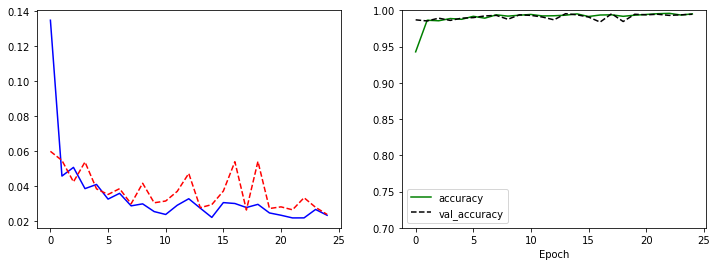

In [14]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(his.history['loss'], 'b-', label='loss')
plt.plot(his.history['val_loss'], 'r--', label='val_loss')

plt.subplot(1, 2, 2)
plt.plot(his.history['accuracy'], 'g-', label='accuracy')
plt.plot(his.history['val_accuracy'], 'k--', label='val_accuracy')
plt.ylim(0.7, 1)

plt.xlabel('Epoch')
plt.legend()

plt.show()


In [15]:
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 1ms/step - loss: 0.0240 - accuracy: 0.9946


[0.024013228714466095, 0.994615375995636]

In [20]:
print(wine['quality'].describe())
print(wine['quality'].value_counts())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


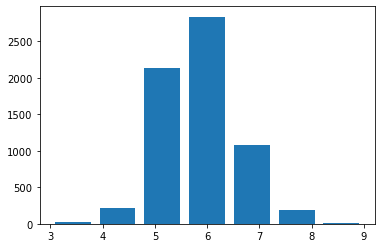

In [21]:
plt.hist(wine['quality'], bins=7, rwidth=0.8)
plt.show()

In [31]:
wine.loc[wine['quality'] <= 4, 'grade'] = 0
wine.loc[wine['quality'] == 5, 'grade'] = 1
wine.loc[wine['quality'] == 6, 'grade'] = 2
wine.loc[wine['quality'] >= 7, 'grade'] = 3

In [33]:
print(wine['grade'].describe())
print(wine['grade'].value_counts())

count    6497.000000
mean        1.791750
std         0.796123
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: grade, dtype: float64
2    2836
1    2138
3    1277
0     246
Name: grade, dtype: int64


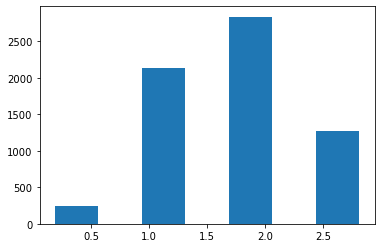

In [44]:
plt.hist(wine['grade'], bins=4, rwidth=0.5)
plt.show()

In [47]:
del wine['quality']
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()

In [49]:
train_idx = int(len(wine_np) * 0.8)

In [51]:
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=4)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=4)

In [54]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='softmax')
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(lr=0.01),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [56]:
his = model.fit(train_X, train_Y, epochs=100, batch_size=32, validation_split=0.25)

Epoch 1/100
122/122 [==============================] - 0s 2ms/step - loss: 0.3672 - accuracy: 0.8286 - val_loss: 0.3768 - val_accuracy: 0.8262
Epoch 2/100
122/122 [==============================] - 0s 2ms/step - loss: 0.3632 - accuracy: 0.8281 - val_loss: 0.3785 - val_accuracy: 0.8238
Epoch 3/100
122/122 [==============================] - 0s 2ms/step - loss: 0.3556 - accuracy: 0.8386 - val_loss: 0.3809 - val_accuracy: 0.8146
Epoch 4/100
122/122 [==============================] - 0s 2ms/step - loss: 0.3638 - accuracy: 0.8317 - val_loss: 0.3783 - val_accuracy: 0.8177
Epoch 5/100
122/122 [==============================] - 0s 2ms/step - loss: 0.3568 - accuracy: 0.8337 - val_loss: 0.3731 - val_accuracy: 0.8238
Epoch 6/100
122/122 [==============================] - 0s 2ms/step - loss: 0.3536 - accuracy: 0.8360 - val_loss: 0.3768 - val_accuracy: 0.8162
Epoch 7/100
122/122 [==============================] - 0s 2ms/step - loss: 0.3573 - accuracy: 0.8347 - val_loss: 0.3961 - val_accuracy: 0.8031

Epoch 58/100
122/122 [==============================] - 0s 2ms/step - loss: 0.3263 - accuracy: 0.8442 - val_loss: 0.3878 - val_accuracy: 0.8200
Epoch 59/100
122/122 [==============================] - 0s 2ms/step - loss: 0.3244 - accuracy: 0.8496 - val_loss: 0.3877 - val_accuracy: 0.8185
Epoch 60/100
122/122 [==============================] - 0s 2ms/step - loss: 0.3209 - accuracy: 0.8476 - val_loss: 0.3922 - val_accuracy: 0.8223
Epoch 61/100
122/122 [==============================] - 0s 2ms/step - loss: 0.3204 - accuracy: 0.8471 - val_loss: 0.3858 - val_accuracy: 0.8354
Epoch 62/100
122/122 [==============================] - 0s 2ms/step - loss: 0.3148 - accuracy: 0.8491 - val_loss: 0.4026 - val_accuracy: 0.8231
Epoch 63/100
122/122 [==============================] - 0s 2ms/step - loss: 0.3180 - accuracy: 0.8499 - val_loss: 0.4016 - val_accuracy: 0.8146
Epoch 64/100
122/122 [==============================] - 0s 2ms/step - loss: 0.3133 - accuracy: 0.8476 - val_loss: 0.4034 - val_accuracy:

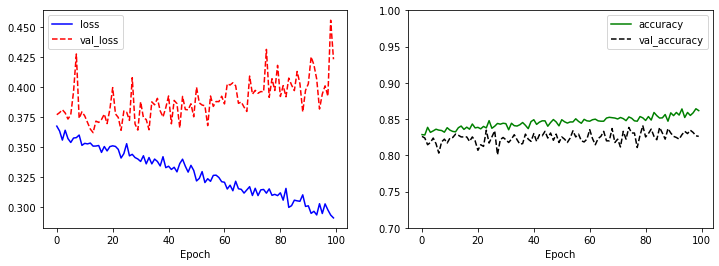

In [58]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(his.history['loss'], 'b-', label='loss')
plt.plot(his.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(his.history['accuracy'], 'g-', label='accuracy')
plt.plot(his.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [59]:
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 1ms/step - loss: 0.3849 - accuracy: 0.8292


[0.38491445779800415, 0.829230785369873]